<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective-in-business-terms" data-toc-modified-id="Objective-in-business-terms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective in business terms</a></span></li><li><span><a href="#Obtain-the-data" data-toc-modified-id="Obtain-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtain the data</a></span><ul class="toc-item"><li><span><a href="#Export-.csv-from-Fidelity" data-toc-modified-id="Export-.csv-from-Fidelity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Export .csv from Fidelity</a></span></li><li><span><a href="#Read-data-from-.csv" data-toc-modified-id="Read-data-from-.csv-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read data from .csv</a></span></li><li><span><a href="#Add-response-variable" data-toc-modified-id="Add-response-variable-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Add response variable</a></span></li><li><span><a href="#Clean-the-data" data-toc-modified-id="Clean-the-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Clean the data</a></span></li></ul></li><li><span><a href="#Analyze-the-repsonse-variables" data-toc-modified-id="Analyze-the-repsonse-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyze the repsonse variables</a></span><ul class="toc-item"><li><span><a href="#Distributions-of-response-variables" data-toc-modified-id="Distributions-of-response-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distributions of response variables</a></span></li><li><span><a href="#Fit-distribution-of-response-variables" data-toc-modified-id="Fit-distribution-of-response-variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fit distribution of response variables</a></span></li></ul></li><li><span><a href="#Model-Selection-Using-Subset-Selection-Approach" data-toc-modified-id="Model-Selection-Using-Subset-Selection-Approach-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Selection Using Subset Selection Approach</a></span><ul class="toc-item"><li><span><a href="#Create-design-matrix-and-response-variable" data-toc-modified-id="Create-design-matrix-and-response-variable-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create design matrix and response variable</a></span></li><li><span><a href="#Best-subset-selection" data-toc-modified-id="Best-subset-selection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Best subset selection</a></span></li><li><span><a href="#Foward-selection" data-toc-modified-id="Foward-selection-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Foward selection</a></span></li><li><span><a href="#Backward-selection" data-toc-modified-id="Backward-selection-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Backward selection</a></span></li></ul></li><li><span><a href="#Model-Selection-Using-Validation-Set-Approach" data-toc-modified-id="Model-Selection-Using-Validation-Set-Approach-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection Using Validation Set Approach</a></span><ul class="toc-item"><li><span><a href="#Best-subset-selection" data-toc-modified-id="Best-subset-selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Best subset selection</a></span></li><li><span><a href="#Forward-selection" data-toc-modified-id="Forward-selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Forward selection</a></span></li></ul></li><li><span><a href="#Model-Selection-Using-Cross-Validation" data-toc-modified-id="Model-Selection-Using-Cross-Validation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Selection Using Cross-Validation</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Long-Short-Term-Memory" data-toc-modified-id="Long-Short-Term-Memory-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Long Short-Term Memory</a></span></li><li><span><a href="#Classification-Methods" data-toc-modified-id="Classification-Methods-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Classification Methods</a></span><ul class="toc-item"><li><span><a href="#Create-classification-response-variable" data-toc-modified-id="Create-classification-response-variable-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Create classification response variable</a></span></li></ul></li></ul></div>

# Incubator_challenge_section_1, Jing CAO, 4/10/2020

## Objective in business terms

Since I am interested in trading stocks and options in the stock market, I used historical Nasdaq ETF information (QQQ) to predict the fractional change of the stock price after certain elapse times (one day, one week and one month). Although I know it's an impossible task (otherwise people would use it to predict stock price), I just use it as a normal data set to practice my statistical and machine learning skills. I get the data from the Broker Fidelity with different indicators I'm interested in. The fractional movement of the price was set to the response variable. I performed best subset selection by identifying the best model that contains a given number of predictors.

## Obtain the data

### Export .csv from Fidelity

We first plot QQQ daily chart for six years with several different indicators (prices, volumn, EMA(5,10,20,50,100), KST, RSI, MACD, etc.) and then export to .csv file for further analysis.

Here is one example, 
![alt text](qqq_fidelity.png "title")

### Read data from .csv

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

/Users/jingcao/anaconda3/envs/mlbook/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
QQQ_df = pd.read_csv("QQQ-20190210-daily.csv")
print(QQQ_df.shape)
QQQ_df.head(15)

(1510, 17)


,Date,Open,High,Low,Close,Volume,"EMA(5,Modern)","EMA(10,Modern)","EMA(20,Modern)","EMA(50,Modern)","EMA(100,Modern)","KST(10,10|15,10|20,10|30,15)",SMA(10),RSI(14),"MACD(12,26)","EMA(9,Modern)",Histogram
0,2/19/13,67.8900,68.260,67.86,68.240,23433248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/20/13,68.2400,68.250,67.18,67.190,38200240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/21/13,66.9600,67.010,66.23,66.470,45855568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/22/13,66.8400,67.150,66.59,67.139,21969536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/25/13,67.6000,67.810,66.25,66.310,40927520,66.816533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2/26/13,66.4200,66.680,65.96,66.560,42088736,66.731022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2/27/13,66.5700,67.650,66.47,67.239,36339456,66.900348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2/28/13,67.2400,67.740,67.09,67.100,28557152,66.966899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3/1/13,66.8600,67.500,66.54,67.380,31617696,67.104599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3/4/13,67.1900,67.690,67.07,67.680,19380448,67.296399,67.230655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
QQQ_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'EMA(5,Modern)',
       'EMA(10,Modern)', 'EMA(20,Modern)', 'EMA(50,Modern)', 'EMA(100,Modern)',
       'KST(10,10|15,10|20,10|30,15)', 'SMA(10)', 'RSI(14)', 'MACD(12,26)',
       'EMA(9,Modern)', 'Histogram'],
      dtype='object')

First of all, we note that the several variables are missing for some of the data points. The isnull() function can be used to identify the missing observations. 

In [4]:
print("Number of null values:")
print(QQQ_df.isnull().sum())

Number of null values:
Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Volume                           0
EMA(5,Modern)                    4
EMA(10,Modern)                   9
EMA(20,Modern)                  19
EMA(50,Modern)                  49
EMA(100,Modern)                 99
KST(10,10|15,10|20,10|30,15)    44
SMA(10)                         53
RSI(14)                         14
MACD(12,26)                     25
EMA(9,Modern)                   33
Histogram                       33
dtype: int64


### Add response variable

In [5]:
QQQ_clean = QQQ_df.copy()

# intrduce elapsed time (business days) for the price change
elapse_time = [6, 11, 21, 41] 

for i in elapse_time:
    rd = QQQ_clean['Close'][i:]
    rd.reset_index(drop=True, inplace=True)
    rd_o = QQQ_clean['Close'][:len(rd)]
    rd_o.reset_index(drop=True,inplace=True)
    rd = (rd - rd_o) / rd_o * 100  # fraction change of the close price
    
    rd.rename('res'+str(i)+'_Close',inplace = True)
    QQQ_clean = pd.concat([QQQ_clean, rd], axis=1)

QQQ_clean.head(10)    

,Date,Open,High,Low,Close,Volume,"EMA(5,Modern)","EMA(10,Modern)","EMA(20,Modern)","EMA(50,Modern)",...,"KST(10,10|15,10|20,10|30,15)",SMA(10),RSI(14),"MACD(12,26)","EMA(9,Modern)",Histogram,res6_Close,res11_Close,res21_Close,res41_Close
0,2/19/13,67.89,68.26,67.86,68.240,23433248,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.466882,0.395662,0.687280,-1.569461
1,2/20/13,68.24,68.25,67.18,67.190,38200240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.133949,2.232475,1.101354,1.339485
2,2/21/13,66.96,67.01,66.23,66.470,45855568,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.369039,3.460208,3.189409,3.490296
3,2/22/13,66.84,67.15,66.59,67.139,21969536,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.805791,2.727178,1.788826,3.442113
4,2/25/13,67.60,67.81,66.25,66.310,40927520,66.816533,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.574122,3.634444,3.619364,4.690092
5,2/26/13,66.42,66.68,65.96,66.560,42088736,66.731022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.929688,3.109976,3.366887,4.852764
6,2/27/13,66.57,67.65,66.47,67.239,36339456,66.900348,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.157974,2.410803,2.574399,3.466738
7,2/28/13,67.24,67.74,67.09,67.100,28557152,66.966899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.488823,2.101341,2.086438,4.634873
8,3/1/13,66.86,67.50,66.54,67.380,31617696,67.104599,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.359751,1.454438,2.463639,4.956961
9,3/4/13,67.19,67.69,67.07,67.680,19380448,67.296399,67.230655,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.536643,0.812648,1.078605,4.004137


Count all of the missing elements:

In [6]:
print("Number of null values:")
print(QQQ_clean.isnull().sum())

Number of null values:
Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Volume                           0
EMA(5,Modern)                    4
EMA(10,Modern)                   9
EMA(20,Modern)                  19
EMA(50,Modern)                  49
EMA(100,Modern)                 99
KST(10,10|15,10|20,10|30,15)    44
SMA(10)                         53
RSI(14)                         14
MACD(12,26)                     25
EMA(9,Modern)                   33
Histogram                       33
res6_Close                       6
res11_Close                     11
res21_Close                     21
res41_Close                     41
dtype: int64


### Clean the data

The *dropna()* function removes all of the rows that have missing values in any variable:

In [7]:
QQQ_df_clean = QQQ_clean.dropna().drop(['Date'],axis=1) # also drop the date column
print('Number of null values:')
print(QQQ_df_clean.isnull().sum())
QQQ_df_clean.reset_index(drop=True, inplace=True)
QQQ_df_clean.shape

Number of null values:
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
EMA(5,Modern)                   0
EMA(10,Modern)                  0
EMA(20,Modern)                  0
EMA(50,Modern)                  0
EMA(100,Modern)                 0
KST(10,10|15,10|20,10|30,15)    0
SMA(10)                         0
RSI(14)                         0
MACD(12,26)                     0
EMA(9,Modern)                   0
Histogram                       0
res6_Close                      0
res11_Close                     0
res21_Close                     0
res41_Close                     0
dtype: int64


(1370, 20)

In [8]:
QQQ_df_clean.head(10)

,Open,High,Low,Close,Volume,"EMA(5,Modern)","EMA(10,Modern)","EMA(20,Modern)","EMA(50,Modern)","EMA(100,Modern)","KST(10,10|15,10|20,10|30,15)",SMA(10),RSI(14),"MACD(12,26)","EMA(9,Modern)",Histogram,res6_Close,res11_Close,res21_Close,res41_Close
0,74.29,75.03,74.25,74.97,47777680,73.539947,72.845158,72.461162,71.972482,70.656830,-11.015488,-19.008037,68.564802,0.320974,-0.041576,0.362550,-0.506869,0.533547,2.027478,3.814859
1,75.02,75.35,74.82,75.30,31417856,74.126632,73.291493,72.731527,72.102973,70.748774,-5.393682,-18.040074,69.980978,0.504247,0.067589,0.436659,-0.650730,-0.092961,1.819389,3.864542
2,75.36,75.52,75.17,75.47,19790960,74.574421,73.687585,72.992334,72.235014,70.842263,1.086812,-16.148103,70.712953,0.655652,0.185202,0.470451,-1.603286,0.212005,2.159799,3.431827
3,75.54,75.59,75.18,75.37,31747088,74.839614,73.993479,73.218778,72.357954,70.931922,7.455043,-13.316985,69.637287,0.758826,0.299926,0.458899,-1.154305,0.530715,1.910574,3.502720
4,75.60,75.74,75.35,75.56,24631504,75.079743,74.278301,73.441752,72.483525,71.023567,13.331365,-9.638165,70.553815,0.846169,0.409175,0.436994,-0.780836,1.296983,-0.066173,3.308629
5,75.54,75.74,75.25,75.37,36278800,75.176495,74.476791,73.625395,72.596720,71.109635,18.388674,-5.397193,68.332466,0.889800,0.505300,0.384500,0.000000,2.122861,0.152581,3.290434
6,74.72,74.74,74.37,74.59,37734064,74.980997,74.497375,73.717262,72.674888,71.178553,22.600018,-0.835357,59.983144,0.851622,0.574564,0.277057,0.858024,3.257809,1.018903,5.067703
7,74.87,74.98,74.58,74.81,21135856,74.923998,74.554216,73.821332,72.758618,71.250463,26.997988,3.980545,61.415178,0.829555,0.625562,0.203992,1.096110,2.339259,1.162946,6.015239
8,74.95,74.96,74.20,74.26,24748784,74.702665,74.500722,73.863110,72.817495,71.310057,30.675704,8.869796,56.018046,0.758937,0.652237,0.106700,2.033396,2.908699,1.562079,7.056289
9,74.99,75.02,74.33,74.50,24426800,74.635110,74.500591,73.923766,72.883476,71.373225,34.158986,13.828542,57.762343,0.714107,0.664611,0.049496,2.738255,3.087248,2.228188,6.020134


## Analyze the repsonse variables

### Distributions of response variables

As well known, in order to model the stock price change in mathematical finance, the fractional price change is assumed to have Gaussian distributions. We would like to inspect this assumption in our data. 

We first calculate the sample mean $\hat{\mu}$ and sample variance $\hat{\sigma}^2$ of response variables and then compare the histogram to the correspondng Gaussian distribution with parameters $\hat{\mu}$ and $\hat{\sigma}^2$. 

In [9]:
import scipy.stats as stats
from scipy.stats import norm


def plot_hist_norm(data, et):
    plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
    mu, std = norm.fit(data)
    
    plt.xlim(-15,15) # set xlim to (-15,15)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label="$\mu={0:.2f}, \sigma={1:.2f}$".format(mu,std))
    #plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    #plt.title(title)
    plt.xlabel('% change after '+str(et)+' days')
    plt.ylabel('PDF')
    plt.legend(loc="upper left", prop={'size': 14})

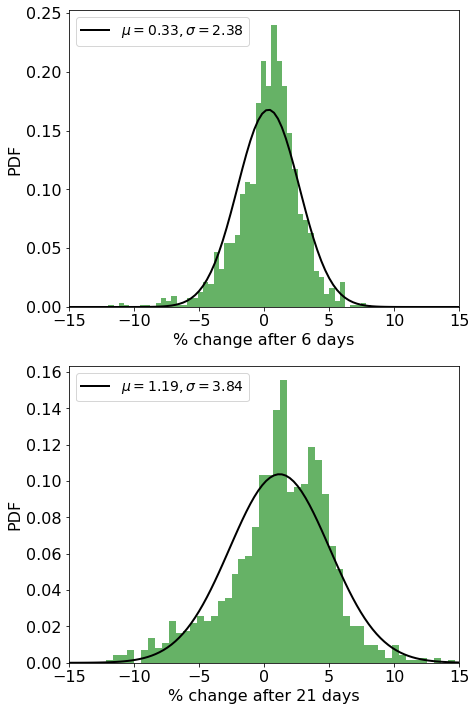

In [10]:
plt.figure(figsize=(7,12))
plt.rcParams.update({'font.size': 16, 'lines.markersize': 10})

plt.subplot(2, 1, 1)
et = 6
data = QQQ_df_clean['res'+str(et)+'_Close']
plot_hist_norm(data, et)

plt.subplot(2, 1, 2)
et = 21
data = QQQ_df_clean['res'+str(et)+'_Close']
plot_hist_norm(data, et)

We can see that the histogram tilted comparing to the corresponding Gaussian distribution. 

### Fit distribution of response variables

Next, we fit the histogram using Gaussian distribution with two fitting parameters $\mu$ and $\sigma^2$. The correspnding normal probability plot is shown as well. 

In [11]:
from scipy.optimize import curve_fit

def func(x, a, b):
   return 1.0/np.sqrt(2*np.pi*b)*np.exp(-(x-a)**2/2/b)

def plot_hist_norm_fitting(data, et):
    plt.figure(figsize=(15,6))
    plt.rcParams.update({'font.size': 16, 'lines.markersize': 10})

    plt.subplot(1, 2, 1)
    nbins = 50
    fig1 = plt.hist(data, bins=nbins, density=True, alpha=0.6, color='g')
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k--', linewidth=2, label="$\mu={0:.2f}, \sigma={1:.2f}$".format(mu,std))

    # find middle point of each bin 
    x1 = []
    dx = (fig1[1][-1] - fig1[1][0]) / nbins
    for i in range(len(fig1[1])-1):
        x1.append((fig1[1][i]+fig1[1][i+1])/2.0)
    y1 = fig1[0]

    p0 = np.array([0,1])  # initial guess of fitting parameters
    params, paramvar = curve_fit(func, x1, y1, p0)
    plt.plot(x, func(x, *params), 'r',linewidth=2, 
             label="$\mu={0:.2f}, \sigma={1:.2f}$".format(params[0],np.sqrt(params[1])))
    
    #   title = "Fit results: mu = %.2f,  std = %.2f" % (params[0], np.sqrt(params[1]))
    #   plt.title(title)
    plt.xlabel('% change after '+str(et)+' days')
    plt.ylabel('PDF')
    plt.legend(loc="upper left", prop={'size': 14})
    
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", sparams=(params[0],np.sqrt(params[1])), plot=plt)

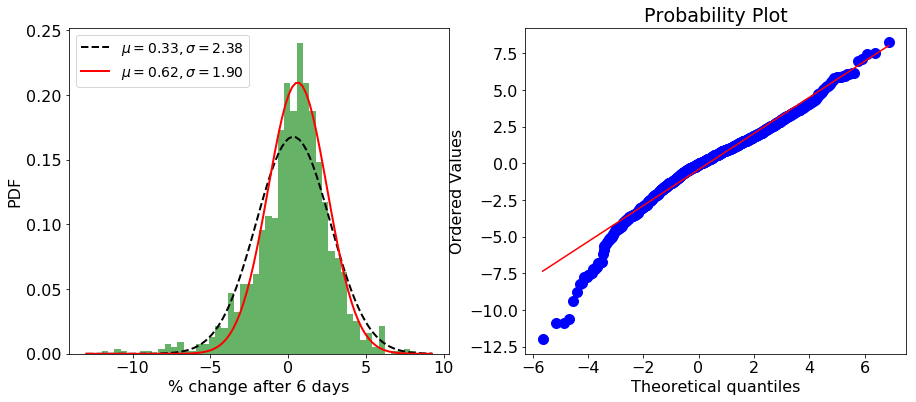

In [12]:
et = 6
data = QQQ_df_clean['res'+str(et)+'_Close']
plot_hist_norm_fitting(data, et)

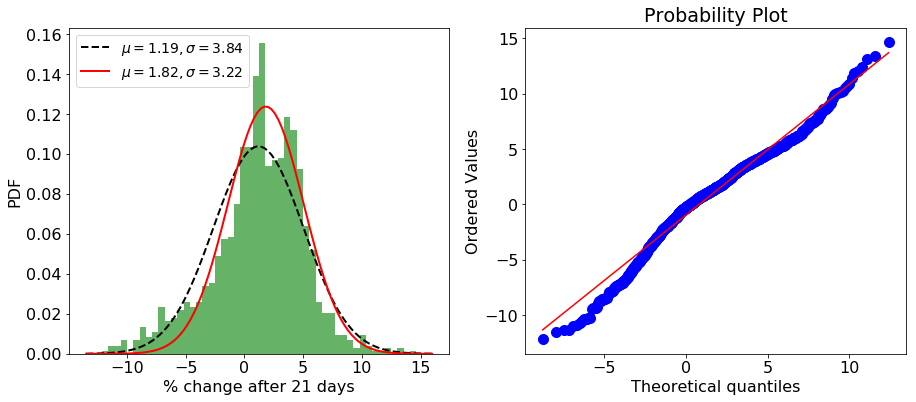

In [13]:
et = 21
data = QQQ_df_clean['res'+str(et)+'_Close']
plot_hist_norm_fitting(data, et)

A Gaussian distribution with fitting parameters $\mu$ and $\sigma^2$ can be used to fit the data. The fitting curves are displayed by red solid lines. Now we can see the histogram has a relatively convincing bell shape except around both ends of the tails. 

In addition, for the visualization purpose, the probability plot can be constructed for detecting whether the distribution follows a theoretical estimation or not. The same conclusion can be extracted from the probability plot.  

Such behavior was well known in finance business (people would feel panic when they observe the stock price drops a lot and then would keep selling more). 

## Model Selection Using Subset Selection Approach 

### Create design matrix and response variable

In [14]:
y = QQQ_df_clean.res6_Close
X = QQQ_df_clean.drop(['res6_Close','res11_Close','res21_Close','res41_Close'],axis=1).astype('float64')

### Best subset selection

We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS.

In [15]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.GLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [16]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    # go through all possible combinations of feature list
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed {0:7d} models on {1:3d} predictors in {2:.5f} seconds.".format(models.shape[0], k, toc-tic))
    
    # Return the best model, along with some other useful information about the model
    return best_model

This returns a DataFrame containing the best model that we generated, along with some extra information about the model. Now we want to call that function for each number of predictors $k$ :

In [17]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,17):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed      16 models on   1 predictors in 0.12184 seconds.
Processed     120 models on   2 predictors in 0.32624 seconds.
Processed     560 models on   3 predictors in 1.87322 seconds.
Processed    1820 models on   4 predictors in 5.18522 seconds.
Processed    4368 models on   5 predictors in 11.34968 seconds.
Processed    8008 models on   6 predictors in 22.35699 seconds.
Processed   11440 models on   7 predictors in 32.71039 seconds.
Processed   12870 models on   8 predictors in 38.93883 seconds.
Processed   11440 models on   9 predictors in 37.33750 seconds.
Processed    8008 models on  10 predictors in 25.64172 seconds.
Processed    4368 models on  11 predictors in 13.92829 seconds.
Processed    1820 models on  12 predictors in 6.09146 seconds.
Processed     560 models on  13 predictors in 1.95606 seconds.
Processed     120 models on  14 predictors in 0.44200 seconds.
Processed      16 models on  15 predictors in 0.06062 seconds.
Processed       1 models on  16 predictors in 0.

In [18]:
models_best

,RSS,model
1,7683.247577,<statsmodels.regression.linear_model.Regressio...
2,7554.013380,<statsmodels.regression.linear_model.Regressio...
3,7463.665889,<statsmodels.regression.linear_model.Regressio...
4,7431.565995,<statsmodels.regression.linear_model.Regressio...
5,7369.554687,<statsmodels.regression.linear_model.Regressio...
6,7326.242940,<statsmodels.regression.linear_model.Regressio...
7,7288.865323,<statsmodels.regression.linear_model.Regressio...
8,7258.615973,<statsmodels.regression.linear_model.Regressio...
9,7231.367569,<statsmodels.regression.linear_model.Regressio...
10,7201.099856,<statsmodels.regression.linear_model.Regressio...


In [19]:
print(models_best.loc[3, "model"].summary())

                            GLS Regression Results                            
Dep. Variable:             res6_Close   R-squared:                       0.055
Model:                            GLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     26.36
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.41e-16
Time:                        23:56:03   Log-Likelihood:                -3105.2
No. Observations:                1370   AIC:                             6216.
Df Residuals:                    1367   BIC:                             6232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMA(5,Modern)     -0.8199      0.106     -7.

In [20]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1     0.026877
2     0.043245
3     0.054688
4     0.058754
5     0.066608
6     0.072094
7     0.076828
8     0.080659
9     0.084110
10    0.087944
11    0.088961
12    0.090208
13    0.091363
14    0.091374
15    0.091801
16    0.091375
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will help us decide which model to select.

Text(0,0.5,'BIC')

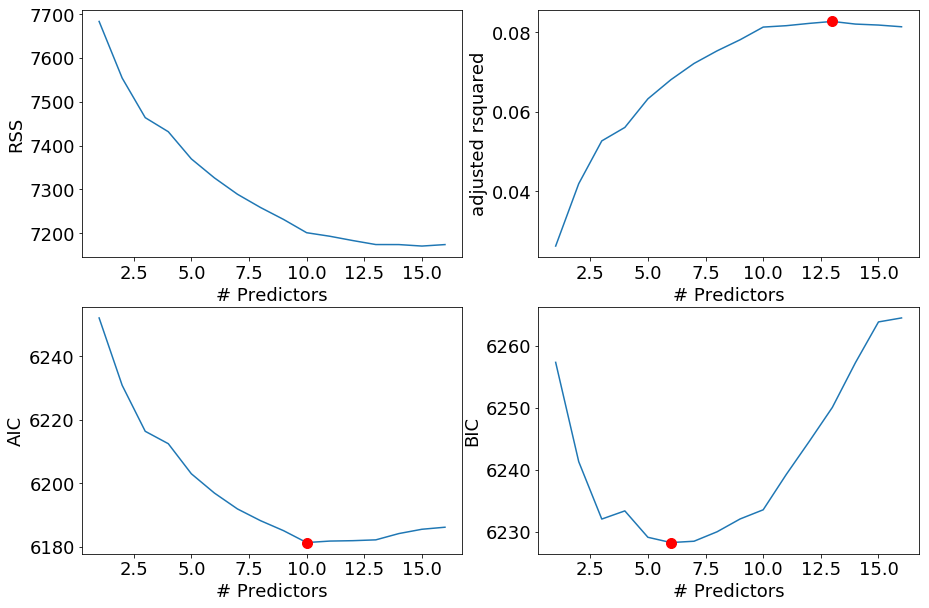

In [21]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')


### Foward selection

We can also use a similar approach to perform forward stepwise selection, using a slight modification of the functions we defined above:

In [22]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed {0:3d} models on {1:3d} predictors in {2:.5f} seconds.".format(models.shape[0], len(predictors)+1, toc-tic))
    
    # Return the best model, along with some other useful information about the model
    return best_model

Now let's see how much faster it runs!

In [23]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time: {0:.5f} seconds".format(toc-tic))

Processed  16 models on   1 predictors in 0.41506 seconds.
Processed  15 models on   2 predictors in 0.03690 seconds.
Processed  14 models on   3 predictors in 0.03750 seconds.
Processed  13 models on   4 predictors in 0.03660 seconds.
Processed  12 models on   5 predictors in 0.03772 seconds.
Processed  11 models on   6 predictors in 0.03936 seconds.
Processed  10 models on   7 predictors in 0.05543 seconds.
Processed   9 models on   8 predictors in 0.04431 seconds.
Processed   8 models on   9 predictors in 0.03115 seconds.
Processed   7 models on  10 predictors in 0.03006 seconds.
Processed   6 models on  11 predictors in 0.02530 seconds.
Processed   5 models on  12 predictors in 0.01927 seconds.
Processed   4 models on  13 predictors in 0.01591 seconds.
Processed   3 models on  14 predictors in 0.01118 seconds.
Processed   2 models on  15 predictors in 0.01154 seconds.
Processed   1 models on  16 predictors in 0.00849 seconds.
Total elapsed time: 0.91215 seconds


Let's see how the models stack up against best subset selection:

In [24]:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())

                            GLS Regression Results                            
Dep. Variable:             res6_Close   R-squared:                       0.072
Model:                            GLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     17.66
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           8.68e-20
Time:                        13:36:48   Log-Likelihood:                -3092.5
No. Observations:                1370   AIC:                             6197.
Df Residuals:                    1364   BIC:                             6228.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EMA(5,Modern)      1.8250      0.406      4.

### Backward selection

We can also use a similar approach to perform backward stepwise selection, using a slight modification of the functions we defined above:

In [25]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [26]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  16 models on 15 predictors in 0.10280394554138184 seconds.
Processed  15 models on 14 predictors in 0.06395506858825684 seconds.
Processed  14 models on 13 predictors in 0.05147695541381836 seconds.
Processed  13 models on 12 predictors in 0.04394888877868652 seconds.
Processed  12 models on 11 predictors in 0.04690289497375488 seconds.
Processed  11 models on 10 predictors in 0.06058692932128906 seconds.
Processed  10 models on 9 predictors in 0.03653120994567871 seconds.
Processed  9 models on 8 predictors in 0.028018951416015625 seconds.
Processed  8 models on 7 predictors in 0.029018878936767578 seconds.
Processed  7 models on 6 predictors in 0.02841496467590332 seconds.
Processed  6 models on 5 predictors in 0.0322718620300293 seconds.
Processed  5 models on 4 predictors in 0.036038875579833984 seconds.
Processed  4 models on 3 predictors in 0.0178220272064209 seconds.
Processed  3 models on 2 predictors in 0.015832901000976562 seconds.
Processed  2 models on 1 predicto

In [27]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[6, "model"].params)

------------
Best Subset:
------------
EMA(5,Modern)     1.825036
EMA(20,Modern)   -2.539017
EMA(50,Modern)    0.706772
SMA(10)          -0.042800
RSI(14)           0.028080
Histogram        -7.864310
dtype: float64


In [28]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[6, "model"].params)

-----------------
Foward Selection:
-----------------
Histogram                      -2.711504
RSI(14)                         0.024625
SMA(10)                        -0.044954
KST(10,10|15,10|20,10|30,15)    0.023902
EMA(100,Modern)                -0.007689
MACD(12,26)                     0.227919
dtype: float64


In [29]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[6, "model"].params)

-------------------
Backward Selection:
-------------------
EMA(10,Modern)   -9.925182
EMA(20,Modern)    8.751050
EMA(50,Modern)    1.167352
SMA(10)          -0.038913
RSI(14)           0.027968
MACD(12,26)       9.845467
dtype: float64


## Model Selection Using Validation Set Approach

In order for the validation set approach to yield accurate estimates of the test error, we must use only the training observations to perform all aspects of model-fitting — including variable selection. Therefore, the determination of which model of a given size is best must be made using only the training observations. This point is subtle but important. If the full data set is used to perform the best subset selection step, the validation set errors and cross-validation errors that we obtain will not be accurate estimates of the test error.

In order to use the validation set approach, we begin by splitting the observations into a training set and a test set. We do this by creating a random vector, train, of elements equal to TRUE if the corresponding observation is in the training set, and FALSE otherwise. The vector test has a TRUE if the observation is in the test set, and a FALSE otherwise. Note the *np.invert()* in the command to create test causes TRUEs to be switched to FALSEs and vice versa. We also set a random seed so that the user will obtain the same training set/test set split.

In [30]:
np.random.seed(seed=12)
train = np.random.choice([True, False], size = len(y), replace = True, p = [0.8,0.2])
val = np.invert(train)

We'll define our helper function to outputs the best set of variables for each model size like we did in Section 3. Note that we'll need to modify this to take in both validation and training sets, because we want the returned error to be the validation error:

In [31]:
def processSubset(feature_set, X_train, y_train, X_val, y_val):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_val[list(feature_set)]) - y_val) ** 2).sum()
    return {"model":regr, "RSS":RSS}

### Best subset selection

In [32]:
def getBest(k, X_train, y_train, X_val, y_val):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo, X_train, y_train, X_val, y_val))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    toc = time.time()
    print("Processed {0:7d} models on {1:3d} predictors in {2:.5f} seconds.".format(models.shape[0], k, toc-tic))
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [33]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,17):
    models_best.loc[i] = getBest(i, X[train], y[train], X[val], y[val])

toc = time.time()
print("Total elapsed time: {0:.5f} seconds".format(toc-tic))

Processed      16 models on   1 predictors in 0.07909 seconds.
Processed     120 models on   2 predictors in 0.37332 seconds.
Processed     560 models on   3 predictors in 1.63511 seconds.
Processed    1820 models on   4 predictors in 4.95132 seconds.
Processed    4368 models on   5 predictors in 13.88961 seconds.
Processed    8008 models on   6 predictors in 24.81002 seconds.
Processed   11440 models on   7 predictors in 32.95659 seconds.
Processed   12870 models on   8 predictors in 37.60405 seconds.
Processed   11440 models on   9 predictors in 34.77309 seconds.
Processed    8008 models on  10 predictors in 25.43190 seconds.
Processed    4368 models on  11 predictors in 15.32293 seconds.
Processed    1820 models on  12 predictors in 6.09510 seconds.
Processed     560 models on  13 predictors in 2.01014 seconds.
Processed     120 models on  14 predictors in 0.45777 seconds.
Processed      16 models on  15 predictors in 0.06060 seconds.
Processed       1 models on  16 predictors in 0.

Text(0,0.5,'BIC')

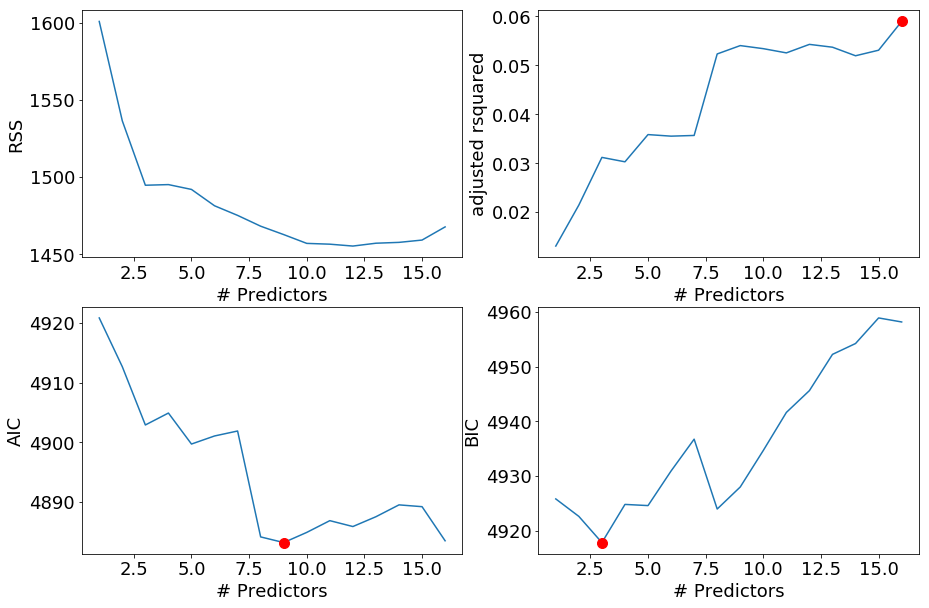

In [34]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')


### Forward selection

And our function to perform forward selection:

In [35]:
def forward(predictors, X_train, y_train, X_val, y_val):
    
    results = []

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_val, y_val))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].idxmin()]
        
    # Return the best model, along with some other useful information about the model
    return best_model

Now, we'll call our forward() function on the training set in order to perform forward selection for all model sizes:

In [36]:
models_train = pd.DataFrame(columns=["RSS", "model"])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X[train], y[train], X[val], y[val])
    predictors = models_train.loc[i]["model"].model.exog_names

Now let's plot the errors, and find the model that minimizes it:

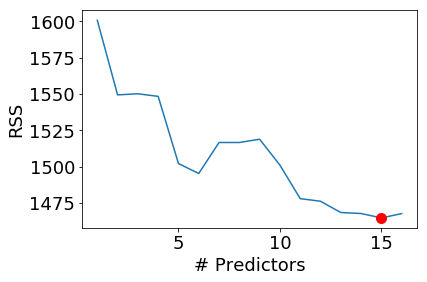

In [37]:
plt.plot(models_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train["RSS"].idxmin(), models_train["RSS"].min(), "or")

We find that the best model (according to the validation set approach) is the one that contains 15 predictors.

## Model Selection Using Cross-Validation


## Neural Network

## Long Short-Term Memory 

## Classification Methods

### Create classification response variable

The classification response variables are created based on the continuous response variables mentioned above. We will start with "res11_Close" since it is associated with the fractional price change of QQQ ETF in two weeks. 

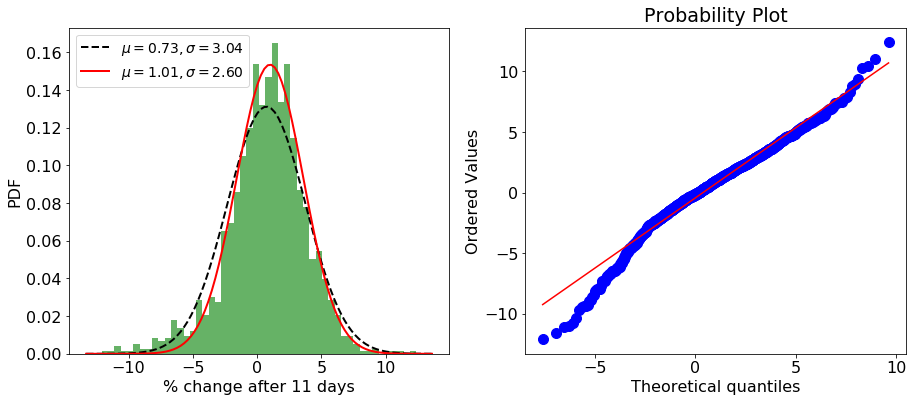

In [39]:
et = 11
data = QQQ_clean['res'+str(et)+'_Close'].dropna()
plot_hist_norm_fitting(data, et)

-0.20941098985819084 2.409410989858191


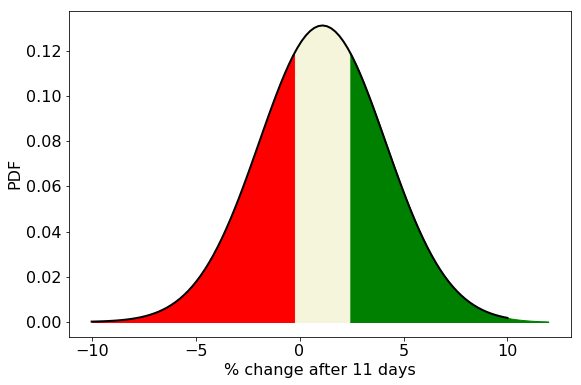

In [40]:
from scipy.stats import norm

plt.figure(figsize=(9,6))
plt.rcParams.update({'font.size': 16, 'lines.markersize': 10})

mu, sigma = 1.10, 3.04
x = np.linspace(-10, 10, 100)
plt.plot(x, func(x, mu, sigma**2), 'k',linewidth=2, 
             label="$\mu={0:.2f}, \sigma={1:.2f}$".format(mu, sigma))
plt.xlabel('% change after '+str(et)+' days')
plt.ylabel('PDF')

p1 = norm.ppf(1./3, loc=mu, scale=sigma)
p2 = norm.ppf(2./3, loc=mu, scale=sigma)
print(p1, p2)

section1 = np.arange(-10, p1, 1/20.)
plt.fill_between(section1,func(section1, mu, sigma**2), color = 'r')

section2 = np.arange(p2, 12, 1/20.)
plt.fill_between(section2,func(section2, mu, sigma**2), color = 'g')

section3 = np.arange(p1, p2, 1/20.)
plt.fill_between(section3,func(section3, mu, sigma**2), color = 'beige')

In [42]:
import math

def classifyChange(x, p1, p2):
    if math.isnan(x):
        return 'NaN'
    elif x <= p1:
        return 1
    elif x >= p2:
        return 3
    else:
        return 2
    
QQQ_clean['res'+str(et)+'_Close_clf'] = [classifyChange(item, p1, p2) for item in QQQ_clean['res'+str(et)+'_Close']]
    

In [43]:
QQQ_clean.tail(5)

,Date,Open,High,Low,Close,Volume,"EMA(5,Modern)","EMA(10,Modern)","EMA(20,Modern)","EMA(50,Modern)",...,SMA(10),RSI(14),"MACD(12,26)","EMA(9,Modern)",Histogram,res6_Close,res11_Close,res21_Close,res41_Close,res11_Close_clf
1505,2/11/19,169.14,169.5800,167.9800,168.40,21434088,168.628663,167.749737,165.672992,164.227945,...,42.570748,58.326391,2.450671,2.136789,0.313883,NaN,NaN,NaN,NaN,NaN
1506,2/12/19,169.59,171.1400,169.3300,170.89,29722073,169.382442,168.320694,166.169850,164.489202,...,45.618089,62.573260,2.555582,2.220547,0.335035,NaN,NaN,NaN,NaN,NaN
1507,2/13/19,171.62,172.1600,170.8200,171.01,26094136,169.924961,168.809659,166.630816,164.744920,...,48.791140,62.770169,2.618227,2.300083,0.318144,NaN,NaN,NaN,NaN,NaN
1508,2/14/19,170.38,171.8300,169.8300,171.22,30326830,170.356641,169.247903,167.067881,164.998845,...,52.005106,63.135690,2.654222,2.370911,0.283311,NaN,NaN,NaN,NaN,NaN
1509,2/15/19,172.51,172.5623,171.1392,171.94,32521685,170.884427,169.737375,167.531893,165.271047,...,55.102333,64.425305,2.709612,2.438651,0.270961,NaN,NaN,NaN,NaN,NaN


In [44]:
from collections import Counter

nString = 'res'+str(et)+'_Close_clf'
print(Counter(QQQ_clean[nString]))

Counter({2: 581, 1: 508, 3: 410, 'NaN': 11})
